# Experiment Lecture 03 : Introduction to Convolutional Neural Network

Deep Learning, RT5101, 2021, Spring, (Tue/Thurs 2:30~3:45)
***

## Syllabus
- This course is for students who do not have prior knowledge of deep learning. It covers basic math tools, artificial neural network, multilayered perceptrons, backpropagation, deep convolutional neural network. The algorithms are applied to linear regression and image classification.
- Textbook: Deep Learning Book by Ian Goodfellow, Yoshua Bengio and Aaron Courville


## Teaching Staff
- Professor: Kyoobin Lee (kyoobinlee@gist.ac.kr)
- TA: Junseok Lee (junseoklee@gm.gist.ac.kr)
- TA: Jongwon Kim (jongwonkim@gm.gist.ac.kr)
- TA: Seongho Bak (bakseongho@gist.ac.kr)
- TA: Changhyun Jun (junch9634@gm.gist.ac.kr)
- TA: Taewon Kim (ailab.ktw@gm.gist.ac.kr)
- TA: Seongju Lee (lsj2121@gm.gist.ac.kr)



## References
- https://pytorch.org/
- https://github.com/hunkim/PyTorchZeroToAll
- https://towardsdatascience.com/how-to-teach-a-computer-to-see-with-convolutional-neural-networks-96c120827cd1
- https://rohanvarma.me/Neural-Net/
- https://excelsior-cjh.tistory.com/79
- http://aikorea.org/cs231n/convolutional-networks/
- http://taewan.kim/post/cnn/
- http://cs231n.github.io/convolutional-networks/



## 1. Convolutional Neural Network
---
![대체 텍스트](https://cdn-images-1.medium.com/max/800/0*-1Pad7loK_dFOUvS.png)
- We are going to implement Convolutional Neural Network
- It has two convolutional layers and two pooling layers

Let's import required python package

Here, ``torchvision`` module provides useful benchmark datasets and image transfromation functions


In [1]:
''' 1. Module Import '''
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

Define device configuration (CPU Computation or GPU Computation)

In [5]:
''' 2. Define device '''
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


Define hyperparameters

In [6]:
''' 3. Configure hyperparameters '''
num_epochs = 10
num_classes = 10
batch_size = 100
learning_rate = 0.1

Download MNIST dataset
You can check the number of dataset by printing ```len(dataset)```

In [7]:
''' 4. Download MNIST dataset '''
# download the MNIST dataset and
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

print('Number of train images: {}'.format(len(train_dataset)))
print('Number of test images: {}'.format(len(test_dataset)))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!
Number of train images: 60000
Number of test images: 10000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


```torch.utils.data.DataLoader``` shuffles the training data and devides the entire data with ```batch_size```

In [8]:
''' 5. Load the data through dataloader '''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Let's check the size of input tensor and label
- Inputs: ``[batch_size, channel, width, height]``
- Labels: ``[batch_size]``


In [9]:
''' 6. Checking data (1) '''
for X_train, y_train in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([100, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([100]) type: torch.LongTensor


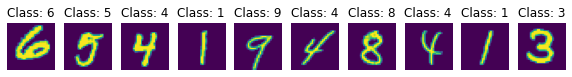

In [67]:
''' 7. Checking data (2) '''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10): # Watching just 10 images
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i][0], (0, 1)))
    plt.title('Class: ' + str(y_train[i].item()))


**Usage of Conv2d Module**

- ``torch.nn.Conv2d(in_channels, out_channels, kernal_size, stride, padding)``
-  ``in_channels``  : number of channels of input
- ``out_channels`` : number of channels of output

**Usage of MaxPool2d Module**

- ``torch.nn.MaxPool2d(kernel_size, stride)``

In [11]:
''' 8. Building simple CNN '''
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Linear model (width*height*channel of the last feature map, Number of class)
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        flatten = out.view(out.size(0), -1)  # Flatten
        # flatten = out.reshape(out.size(0), -1) # We can also use '.reshape'
        score = self.fc(flatten) # Score
        prob = F.softmax(score) # Probability
        return prob


Define the ``criterion`` (Loss) with the ``torch.nn.CrossEntropyLoss()``

Define the ``optimizer`` with ``torch.optim.SGD()`` (Stochastic Gradient Descent) which is a kind of Gradient Descent Algorithm
- It takes two inputs ``model.parameters()`` and ``lr``
- ``model.parameters()`` refers to the learnable parameters of model
- ``lr`` refers to the learning rate ($\alpha$)

You can check the number of weights (parameters)
You can print the structure of the model by using simple code ``print(model)``

In [12]:
''' 8. Configure Optimizer, Objective function '''
model = ConvNet().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
# You can usu another method by just changing name as below
# optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

print(model)

print('\n')

# Also we can check entire number of parameters and the size of each layer
print('Number of parameters: {}'.format(sum(p.numel() for p in model.parameters())))
for p in model.parameters():
    print(p.size())


ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


Number of parameters: 28938
torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


Train the model

In [14]:
''' 9. The method for model training '''
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(device)
        label = label.to(device)
        # https://tutorials.pytorch.kr/recipes/recipes/save_load_across_devices.html#cpu-gpu

        # Forward pass
        output = model(image)
        loss = criterion(output, label)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Printing the result at the specific interval
        if batch_idx % log_interval == 0: # log_interval = 100
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx, len(train_loader), 100. * batch_idx / len(train_loader),
                loss.item()))

Test the model

In [16]:
''' 10. The method for testing model '''
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(device)
            label = label.to(device)
            output = model(image)
            test_loss += criterion(output, label).item()    # The item() method extracts the criterion’s value as a Python float.
            prediction = output.max(1, keepdim = True)[1]   # max (at pytorch): print out maximum value by [0] and argmax by [1]
            # The a above is same as ' prediction = torch.max(ouput, 1, keepdim = True)[1] '
            # print out the biggest value's index of the each tensor in 'output'
            # output 내의 각 tensor 중, 가장 큰 index를 추출

            correct += prediction.eq(label.view_as(prediction)).sum().item()
            # prediction.eq(data)는 prediction배열과 data가 일치하느냐를 검사
            # prediction.eq(data) checks whether list of prediction and data match.
            # 그 뒤에 .sum()을 붙여서 일치하는 것들의 개수 합을 출력
            # The sum of the number of matches is printed out by appending .sum()

            # view_as() : View this tensor as the same size as other
            # label.view_as(prediction) is equivalent to label.view(prediction.size())
            # label을 prediction의 사이즈로 출력
            # print out the label as the same size as prediction


    test_loss /= (len(test_loader.dataset) / batch_size) # 'a /= b' is equal to 'a = a/b
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


In [17]:
''' 11. Train the model and check the test results'''
for epoch in range(1, num_epochs + 1):
    train(model, train_loader, optimizer, log_interval = 100)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}/{}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, num_epochs, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/600 (0%)]	Train Loss: 2.302382
Train Epoch: 1 [100/600 (17%)]	Train Loss: 2.250123
Train Epoch: 1 [200/600 (33%)]	Train Loss: 1.799482
Train Epoch: 1 [300/600 (50%)]	Train Loss: 1.720816
Train Epoch: 1 [400/600 (67%)]	Train Loss: 1.633310
Train Epoch: 1 [500/600 (83%)]	Train Loss: 1.617666

[EPOCH: 1/10], 	Test Loss: 1.6172, 	Test Accuracy: 84.89 % 

Train Epoch: 2 [0/600 (0%)]	Train Loss: 1.592743
Train Epoch: 2 [100/600 (17%)]	Train Loss: 1.520982
Train Epoch: 2 [200/600 (33%)]	Train Loss: 1.536810
Train Epoch: 2 [300/600 (50%)]	Train Loss: 1.500246
Train Epoch: 2 [400/600 (67%)]	Train Loss: 1.518552
Train Epoch: 2 [500/600 (83%)]	Train Loss: 1.502979

[EPOCH: 2/10], 	Test Loss: 1.5099, 	Test Accuracy: 95.55 % 

Train Epoch: 3 [0/600 (0%)]	Train Loss: 1.493720
Train Epoch: 3 [100/600 (17%)]	Train Loss: 1.503051
Train Epoch: 3 [200/600 (33%)]	Train Loss: 1.517580
Train Epoch: 3 [300/600 (50%)]	Train Loss: 1.553294
Train Epoch: 3 [400/600 (67%)]	Train Loss: 1.562000
T

Check the output after training

In [21]:
''' 12. Check the output after training '''
# Torch tensor to numpy array
image_tensor, image_label = train_dataset.__getitem__(random.randint(0, len(train_dataset)))
model_input = image_tensor.unsqueeze(dim=0).to(device)
model_output = model(model_input)

print(f'Image Lable: {image_label}')
print('Model output: {}'.format(model_output.data))
print('Argmax of model output: {}'.format(model_output == torch.max(model_output)))

''' We can check the prediction result of CNN model is equal to image label.'''

Image Lable: 3
Model output: tensor([[2.2689e-12, 8.2035e-10, 4.0387e-11, 1.0000e+00, 8.9543e-13, 1.4810e-06,
         2.6247e-17, 1.4005e-14, 7.6157e-09, 2.8875e-06]], device='cuda:0')
Argmax of model output: tensor([[False, False, False,  True, False, False, False, False, False, False]],
       device='cuda:0')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


' We can check the prediction result of CNN model is equal to image label.'